In [1]:
# conda create -n infersent python=3.6
# source activate infersent
# conda install pytorch torchvision -c pytorch -y
# conda install matplotlib nb_conda ipykernel jupyter 
# python -m ipykernel install --user --name infersent

In [2]:
# import stuff
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

from random import randint
import matplotlib

import numpy as np
import torch

GLOVE_PATH = '../dataset/GloVe/glove.840B.300d.txt'

## Load model

In [6]:
from models import InferSent
MODEL_PATH =  '../new_models/infersent1.pkl'
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

ImportError: cannot import name 'InferSent'

In [5]:
# make sure models.py is in the working directory
# torch.nn.Module.dump_patches = True
model = torch.load('infersent.allnli.pickle')
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
# https://discuss.pytorch.org/t/on-a-cpu-device-how-to-load-checkpoint-saved-on-gpu-device/349
# https://discuss.pytorch.org/t/type-mismatch-on-model-when-using-gpu/11409/20
# https://discuss.pytorch.org/t/set-torch-nn-module-dump-patches-true-and-use-the-patch-tool-to-revert-the-changes/8660

FileNotFoundError: [Errno 2] No such file or directory: 'infersent.allnli.pickle'

In [3]:
# torch.load(..pickle) will use GPU/Cuda by default. If you are on CPU:
# model = torch.load('infersent.allnli.pickle',map_location=lambda storage, loc: storage.cuda(0))
# On CPU, setting the right number of threads with "torch.set_num_threads(k)" may improve performance

In [4]:
# torch.set_num_threads(10)

In [5]:
model.set_glove_path(GLOVE_PATH)

In [6]:
model.build_vocab_k_words(K=1000000)  # doesn't seem to affect anything leh

Vocab size : 1000000


## Load sentences

In [7]:
# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [8]:
# sentences[:5]

In [9]:
# sentences = ["Obama is born in Kenya.", "The place of birth of Obama is Kenya."]

## Encode sentences

In [10]:
# gpu mode : ~1000 sentences/s
# cpu mode : ~75 sentences/s

In [11]:
embeddings = model.encode(sentences[:], bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 129529/130068 (99.59 %)
Speed : 1585.12 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 9815


In [12]:
# print(embeddings)
normed = []
for i,embedding in enumerate(embeddings):
    normed.append(embedding / np.linalg.norm(embedding))
np.dot(normed[0],normed[1])

0.51579285

# Experiments

In [13]:
pairs = [["Obama was born in Kenya.", "Obama is born in Kenya."],
        ["Obama was born in Kenya.", "Obama was not born in Kenya."],
        ["Obama was born in Kenya.", "Obama was delivered in Kenya."],
        ["Obama was born in Kenya.", "The place of birth of Obama in Kenya."],
        ["Obama was born in Kenya.", "Obama was born in New York."],
        ["Obama was born in Kenya.", "Obama has visited Kenya's president's birthplace."],
        ["Obama was born in Kenya.", "Obama is a Muslim."],
        ["Obama was born in Kenya.", "Obama is a Muslim and was born in Kenya."],
        ["Obama was born in Kenya.", "Obama is trying to take our guns away."],
        ["Obama was born in Kenya.", "Obama was born in Kenya and is going to take our guns away."],
        ["Obama was born in Kenya.", "I like ice cream."],
        ["Obama was born in Kenya.", "Lee Kwan Yew was a dictator."],
        ["Obama was born in Kenya.", "Lee Kwan Yew was a dictator."]]

In [23]:
def calc_vect(line):
    embed = model.encode([line], tokenize=False, verbose=False)[0]
    return embed/np.linalg.norm(embed)

def calc_dot(pair):
    print(pair)
    print(np.dot(calc_vect(pair[0]),calc_vect(pair[1])))

for pair in pairs:
    calc_dot(pair)

['Obama was born in Kenya.', 'Obama is born in Kenya.']
0.94283
['Obama was born in Kenya.', 'Obama was not born in Kenya.']
0.8840847
['Obama was born in Kenya.', 'Obama was delivered in Kenya.']
0.7859502
['Obama was born in Kenya.', 'The place of birth of Obama in Kenya.']
0.71321857
['Obama was born in Kenya.', 'Obama was born in New York.']
0.9232921
['Obama was born in Kenya.', "Obama has visited Kenya's president's birthplace."]
0.67720634
['Obama was born in Kenya.', 'Obama is a Muslim.']
0.6035111
['Obama was born in Kenya.', 'Obama is a Muslim and was born in Kenya.']
0.83633363
['Obama was born in Kenya.', 'Obama is trying to take our guns away.']
0.47911784
['Obama was born in Kenya.', 'Obama was born in Kenya and is going to take our guns away.']
0.6686162
['Obama was born in Kenya.', 'I like ice cream.']
0.15393913
['Obama was born in Kenya.', 'Lee Kwan Yew was a dictator.']
0.4500799
['Obama was born in Kenya.', 'Lee Kwan Yew was a dictator.']
0.4500799


In [24]:
a,b = np.random.randn(2048),np.random.randn(2048)
np.dot(a/np.linalg.norm(a),b/np.linalg.norm(b))

-0.001221791690705503

## Visualization

In [25]:
np.linalg.norm(model.encode(['the cat eats.']))

3.5349097

In [26]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [27]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

0.8165241

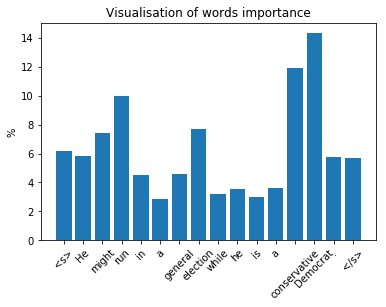

In [28]:
idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])

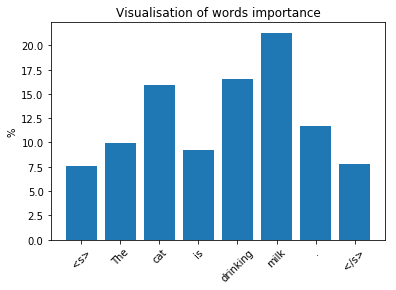

In [29]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

In [30]:
model.build_vocab_k_words(500000) # getting 500K words vocab

KeyboardInterrupt: 

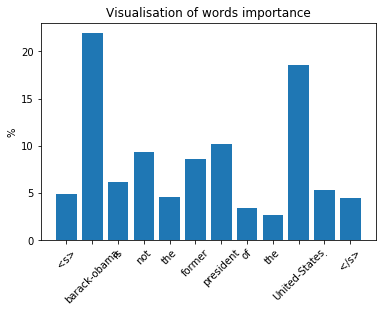

In [31]:
my_sent = 'barack-obama is not the former president of the United-States.'
_, _ = model.visualize(my_sent)